# Introduction to USGS Data Retrieval Python Library
This workbook illustrates the use of the USGS data retrieval library for importing and graphing daily and/or instantaneous (usually 15-minute) dischrage data. Full documentation is available at https://doi-usgs.github.io/dataretrieval-python/examples/USGS_dataretrieval_DailyValues_Examples.html.  For students interested in the R programming language, a similar set of examples are available at https://waterdata.usgs.gov/blog/dataretrieval/

# Install the USGS dataretrieval library

To start, first install using pip (for most Python environments, from the command prompt) or using Anaconda's command prompt (if you have an Anaconda-based environment).

pip install dataretrieval 

or

conda install conda-forge::dataretrieval

# Now import the library

In [2]:
from dataretrieval import nwis

# Define the site number, parameter to plot, and dates  
You can find the site from the USGS map interface at https://waterdata.usgs.gov
Here, we're plotting discharge in cubic feet per second, which has code 00060.  Other codes are at https://help.waterdata.usgs.gov/codes-and-parameters/parameters.  The most commonly measured parameters are under the physical parameter codes.  For example, discharge in cfs is code 00060, and celsius temperature is 00010.

In [9]:
# Set the parameters needed to retrieve data
siteNumber = "12167000" # North Fork Stillaguamish River Near Arlington
parameterCode = "00020" # Daily Discharge.  Use 00061 for instantaneous (so on 15-minute basis)
startDate = "1920-10-01"
endDate = "2020-11-01"

# Download the data
The resulting data are formated as an array of Pandas dataframes.  Here, the length of the resulting dataframe is displayed as plain text. To simplify things, copy the first in the array of dataframes into a new variable called dfDailyStreamflow.

In [12]:
dailyStreamflow = nwis.get_dv(sites=siteNumber, parameterCd=parameterCode, start=startDate, end=endDate) 
print("Retrieved " + str(len(dailyStreamflow[0])) + " data values.")
dfDailyStreamflow = dailyStreamflow[0]

Retrieved 0 data values.


We can display the data as follows:

In [4]:
dfDailyStreamflow

,00060_Mean,00060_Mean_cd,site_no
datetime,,,
2020-10-01 00:00:00+00:00,531.0,A,12167000
2020-10-02 00:00:00+00:00,471.0,A,12167000
2020-10-03 00:00:00+00:00,427.0,A,12167000
2020-10-04 00:00:00+00:00,393.0,A,12167000
2020-10-05 00:00:00+00:00,369.0,A,12167000
2020-10-06 00:00:00+00:00,347.0,A,12167000
2020-10-07 00:00:00+00:00,330.0,A,12167000
2020-10-08 00:00:00+00:00,316.0,A,12167000
2020-10-09 00:00:00+00:00,312.0,A,12167000


# Optional: Clean the data
The next step is optional, but it can be nice to simplify the dataframe by removing extraneous columns and
adding intuitive names to the column headers. 

In [5]:
#Clean flow data
dfQ = dfDailyStreamflow.drop(columns=['00060_Mean_cd','site_no'])
dfQ = dfQ.rename(columns={'00060_Mean':'Q(cfs)'})
dfQ.index = dfQ.index.rename('datetime')
#print out the data frame for inspection
dfQ

,Q(cfs)
datetime,
2020-10-01 00:00:00+00:00,531.0
2020-10-02 00:00:00+00:00,471.0
2020-10-03 00:00:00+00:00,427.0
2020-10-04 00:00:00+00:00,393.0
2020-10-05 00:00:00+00:00,369.0
2020-10-06 00:00:00+00:00,347.0
2020-10-07 00:00:00+00:00,330.0
2020-10-08 00:00:00+00:00,316.0
2020-10-09 00:00:00+00:00,312.0


   # Plot the data
We can also make a simple timeseries plot using the standard matplotlib syntax.  Note that the data looks jagged because we are only plotting the mean value for each day, so full hydrographs are not resolved.

Text(0, 0.5, 'Streamflow (cfs)')

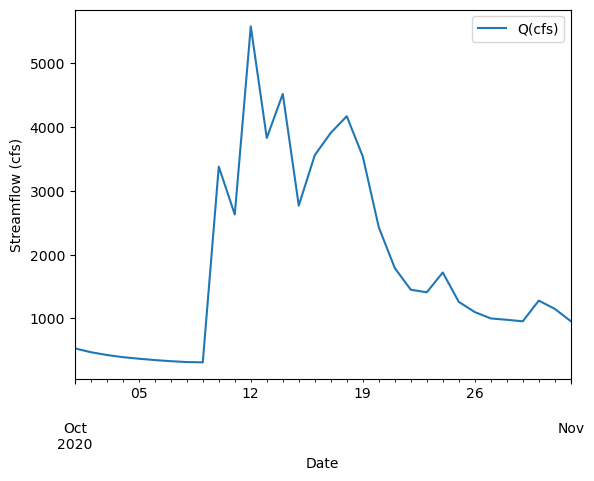

In [6]:
ax = dfQ.plot(y='Q(cfs)')
ax.set_xlabel('Date')
ax.set_ylabel('Streamflow (cfs)')

# Now Download Instantaneous Data
Note here that using the instantaneous download function results in many more data points. This ensures that we resolve all the hydrographs.  You won't need this much data for every assignment, but it can be helpful for making smooth graphs.

In [7]:
# Get instanteous data
discharge = nwis.get_iv(sites=siteNumber, parameterCd=parameterCode, start=startDate, end=endDate)
print('Retrieved ' + str(len(discharge[0])) + ' data values.')
dfInstantaneous=discharge[0]
dfInstantaneous

Retrieved 3076 data values.


,00060,00060_cd,site_no
datetime,,,
2020-10-01 07:00:00+00:00,569.0,A,12167000
2020-10-01 07:15:00+00:00,576.0,A,12167000
2020-10-01 07:30:00+00:00,576.0,A,12167000
2020-10-01 07:45:00+00:00,569.0,A,12167000
2020-10-01 08:00:00+00:00,569.0,A,12167000
...,...,...,...
2020-11-02 06:45:00+00:00,915.0,A,12167000
2020-11-02 07:00:00+00:00,906.0,A,12167000
2020-11-02 07:15:00+00:00,906.0,A,12167000


# Optional: Clean the Instantaneous Data

In [8]:
#Clean flow data
dfQinst = dfInstantaneous.drop(columns=['00060_cd','site_no'])
dfQinst = dfQinst.rename(columns={'00060':'Q(cfs)'})
dfQinst.index = dfQinst.index.rename('datetime')
#print out the data frame for inspection
dfQinst

,Q(cfs)
datetime,
2020-10-01 07:00:00+00:00,569.0
2020-10-01 07:15:00+00:00,576.0
2020-10-01 07:30:00+00:00,576.0
2020-10-01 07:45:00+00:00,569.0
2020-10-01 08:00:00+00:00,569.0
...,...
2020-11-02 06:45:00+00:00,915.0
2020-11-02 07:00:00+00:00,906.0
2020-11-02 07:15:00+00:00,906.0


# Plot the instantaneous data
Now the graph should be much smoother.

Text(0, 0.5, 'Streamflow (cfs)')

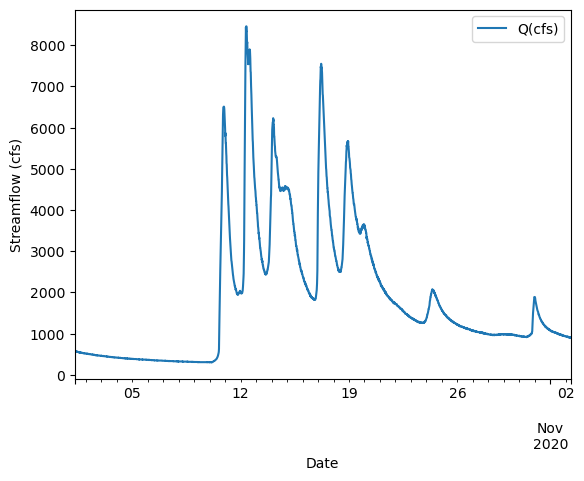

In [9]:
ax2 = dfQinst.plot(y='Q(cfs)')
ax2.set_xlabel('Date')
ax2.set_ylabel('Streamflow (cfs)')

# Download larger dataset and Tabulate results from a subset of the data
In the following, we download several years of daily data and summarize it on a weekly, monthly or seasonal basis.

In [10]:
startDate = "2020-10-01"
endDate = "2022-09-30"

In [11]:
#summarize as 3-monthly values (starting October 1, so OND, JFM, etc)
dfseasonal = dfQ.resample('Q-SEP').mean()
# Get daily data
discharge = nwis.get_dv(sites=siteNumber, parameterCd=parameterCode, start=startDate, end=endDate)
print('Retrieved ' + str(len(discharge[0])) + ' data values.')
dfDaily=discharge[0]
dfDaily
#Clean flow data
dfQ = dfDaily.drop(columns=['00060_Mean_cd','site_no'])
dfQ = dfQ.rename(columns={'00060_Mean':'Q(cfs)'})
dfQ.index = dfQ.index.rename('datetime')
#print out the data frame for inspection
dfQ


Retrieved 730 data values.


,Q(cfs)
datetime,
2020-10-01 00:00:00+00:00,531.0
2020-10-02 00:00:00+00:00,471.0
2020-10-03 00:00:00+00:00,427.0
2020-10-04 00:00:00+00:00,393.0
2020-10-05 00:00:00+00:00,369.0
...,...
2022-09-26 00:00:00+00:00,182.0
2022-09-27 00:00:00+00:00,181.0
2022-09-28 00:00:00+00:00,181.0


Text(0, 0.5, 'Mean Streamflow by Quarter (cfs)')

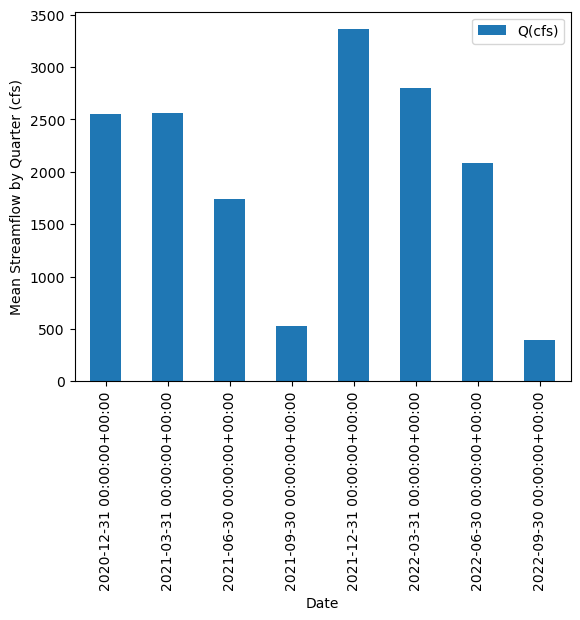

In [15]:
#resample on quarterly basis with end of year in specified month of September.
dfseasonal_mean = dfQ.resample('Q-SEP').mean()
dfseasonal_mean
ax3 = dfseasonal_mean.plot.bar(y='Q(cfs)')
ax3.set_xlabel('Date')
ax3.set_ylabel('Mean Streamflow by Quarter (cfs)')

Text(0, 0.5, 'Mean Streamflow by Month (cfs)')

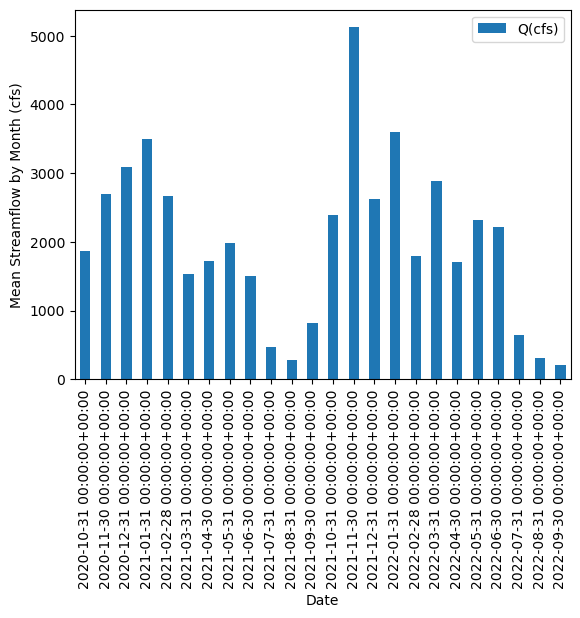

In [13]:
#resample on monthly basis with end of year in specified month of September.
dfmonthly_mean = dfQ.resample('M').mean()
dfmonthly_mean
ax4 = dfmonthly_mean.plot.bar(y='Q(cfs)')
ax4.set_xlabel('Date')
ax4.set_ylabel('Mean Streamflow by Month (cfs)')

Text(0, 0.5, 'Mean Streamflow by week (cfs)')

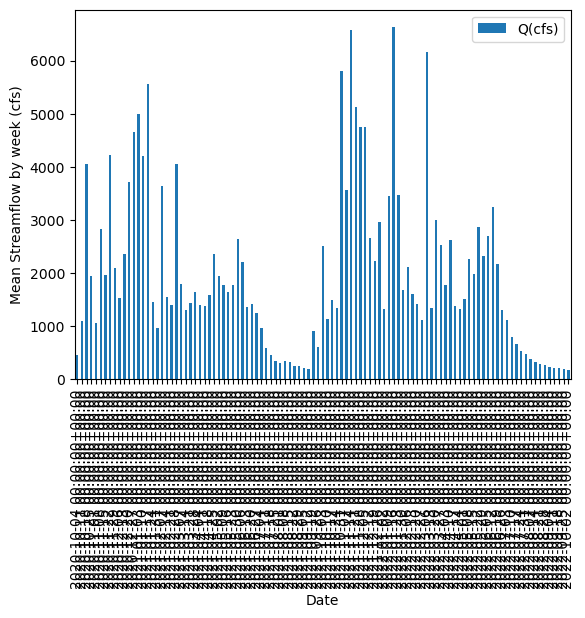

In [14]:
#resample on weekly basis 
dfweekly_mean = dfQ.resample('W').mean()
dfweekly_mean
ax5 = dfweekly_mean.plot.bar(y='Q(cfs)')
ax5.set_xlabel('Date')
ax5.set_ylabel('Mean Streamflow by week (cfs)')